In [23]:
from itertools import chain

from lvmtipo.actors import lvm
from cluplus.proxy import invoke

from lvmagp.images import Image
from lvm.plotimg import plot_images

In [24]:
await invoke(lvm.sci.agc.start(), lvm.skyw.agc.start(), lvm.skye.agc.start(), lvm.spec.agc.start())
rc=await invoke(lvm.sci.agc.status(), lvm.skyw.agc.status(), lvm.skye.agc.status(), lvm.spec.agc.status(),
             return_exceptions=True)
rc.with_actors()

{'lvm.sci.agcam': {'east': {'temperature': 45.625,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'west': {'temperature': 46.875,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 'lvm.skyw.agcam': {'east': {'temperature': 45.875,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'west': {'temperature': 46.25,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 'lvm.skye.agcam': {'east': {'temperature': 46.25,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'west': {'temperature': 43.125,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 'lvm.spec.agcam': {'east': {'temperature': 44.0,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}}}

In [19]:
exptime = 5

In [28]:
await invoke(lvm.sci.agc.reconnect(),
             lvm.skye.agc.reconnect(),
             lvm.skyw.agc.reconnect(),
             lvm.spec.agc.reconnect(),
             return_exceptions=True)

[{'error': Exception("Unknown module type gi.repository.GLib-Error:arv-device-error-quark: Can't connect to device at address '10.8.38.112' (6)")},
 {'error': Exception("Unknown module type gi.repository.GLib-Error:arv-device-error-quark: Can't connect to device at address '10.8.38.113' (6)")},
 {'east': {'state': 'online'}, 'west': {'state': 'online'}},
 {'east': {'state': 'online'}}]

In [41]:
for t in [1, 2, 5, 10]:
    print(f"exptime: {t}")
    for i in range(5):
        rc = await invoke(lvm.sci.agc.expose(t),
                  return_exceptions=True)
        print(rc)
        filenames = rc.flatten().unpack('*filename')
        print(filenames)
print(f"done")


exptime: 1
[{'error': Exception("Command 'expose 1 --image_type dark' failed.")}]
None
[{'error': Exception("Command 'expose 1 --image_type dark' failed.")}]
None
[{'error': Exception("Command 'expose 1 --image_type dark' failed.")}]
None
[{'error': Exception("Command 'expose 1 --image_type dark' failed.")}]
None
[{'error': Exception("Command 'expose 1 --image_type dark' failed.")}]
None
exptime: 2
[{'error': Exception("Command 'expose 2 --image_type dark' failed.")}]
None
[{'error': Exception("Command 'expose 2 --image_type dark' failed.")}]
None
[{'error': Exception("Command 'expose 2 --image_type dark' failed.")}]
None
[{'error': Exception("Command 'expose 2 --image_type dark' failed.")}]
None
[{'error': Exception("Command 'expose 2 --image_type dark' failed.")}]
None
exptime: 5
[{'error': Exception("Command 'expose 5 --image_type dark' failed.")}]
None
[{'error': Exception("Command 'expose 5 --image_type dark' failed.")}]
None
[{'error': Exception("Command 'expose 5 --image_type da

[{'east': {'state': 'written', 'filename': '/data/agcam/60040/lvm.sci.agcam.east_00000010.fits'}, 'west': {'state': 'written', 'filename': '/data/agcam/60040/lvm.sci.agcam.west_00000010.fits'}}, {'east': {'state': 'written', 'filename': '/data/agcam/60040/lvm.skye.agcam.east_00000010.fits'}, 'west': {'state': 'written', 'filename': '/data/agcam/60040/lvm.skye.agcam.west_00000010.fits'}}, {'east': {'state': 'written', 'filename': '/data/agcam/60040/lvm.skyw.agcam.east_00000055.fits'}, 'west': {'state': 'written', 'filename': '/data/agcam/60040/lvm.skyw.agcam.west_00000055.fits'}}, {'east': {'state': 'written', 'filename': '/data/agcam/60040/lvm.spec.agcam.east_00000012.fits'}}]
['/data/agcam/60040/lvm.sci.agcam.east_00000010.fits', '/data/agcam/60040/lvm.sci.agcam.west_00000010.fits', '/data/agcam/60040/lvm.skye.agcam.east_00000010.fits', '/data/agcam/60040/lvm.skye.agcam.west_00000010.fits', '/data/agcam/60040/lvm.skyw.agcam.east_00000055.fits', '/data/agcam/60040/lvm.skyw.agcam.west_0

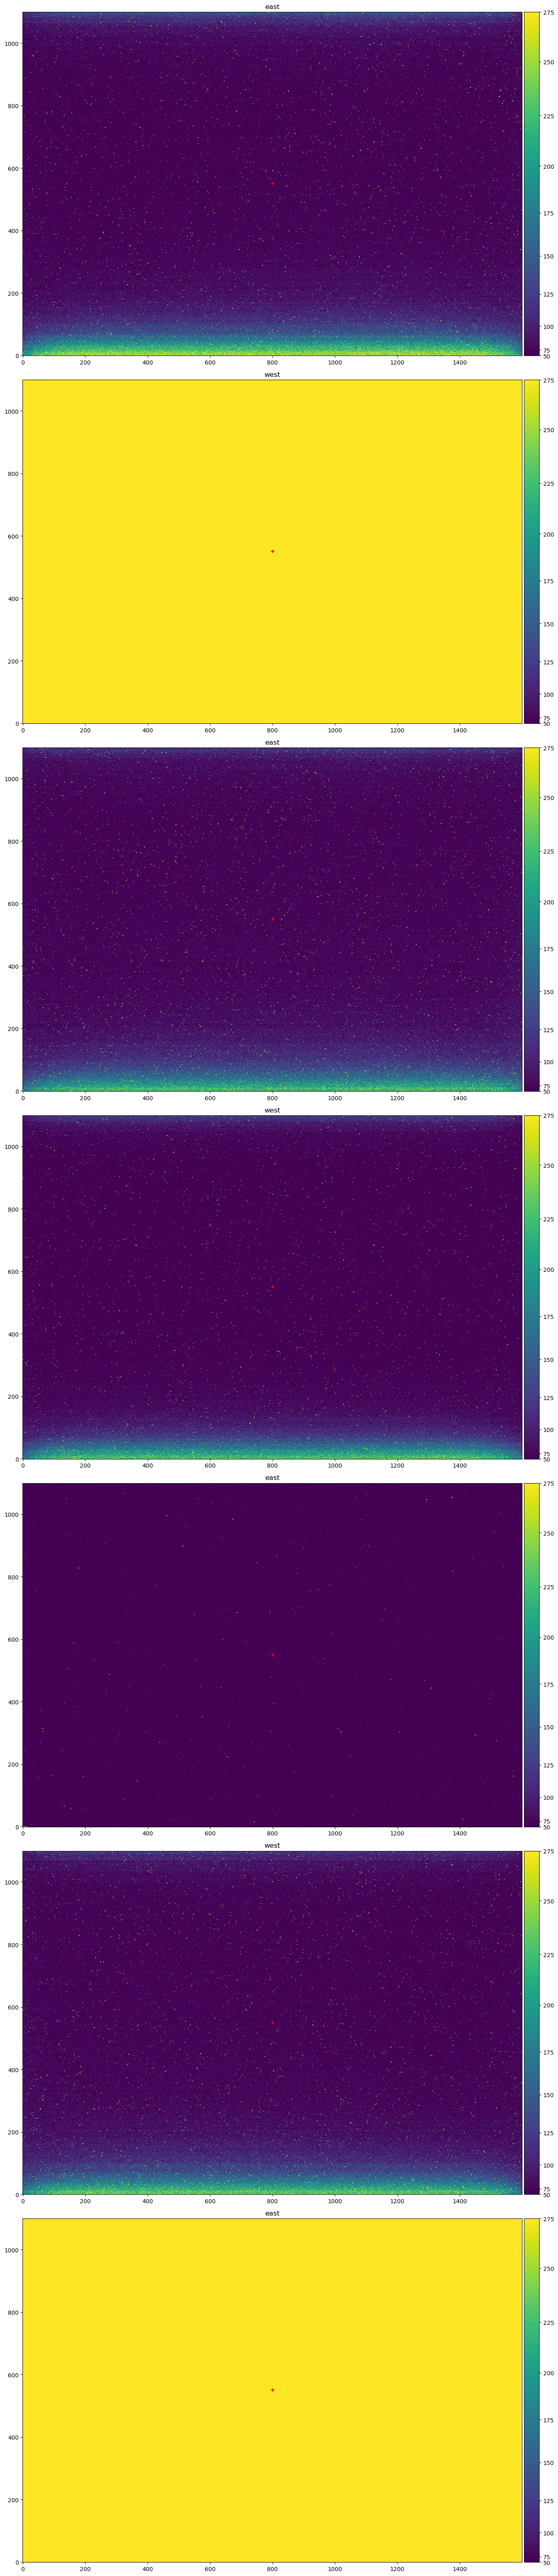

In [25]:

rc = await invoke(lvm.sci.agc.expose(exptime),
                  lvm.skye.agc.expose(exptime),
                  lvm.skyw.agc.expose(exptime),
                  lvm.spec.agc.expose(exptime),
                  return_exceptions=True)
print(rc)
filenames = rc.flatten().unpack('*filename')
print(filenames)
images = [Image.from_file(f) for f in filenames]
plot_images(images, figdisp="v")


In [12]:
await lvm.sci.agc.reconnect()

{'east': {'state': 'online'}, 'west': {'state': 'online'}}

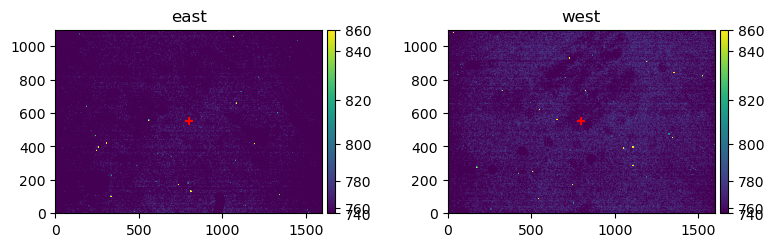

In [21]:
rc = await lvm.sci.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in filenames]
plot_images(images)

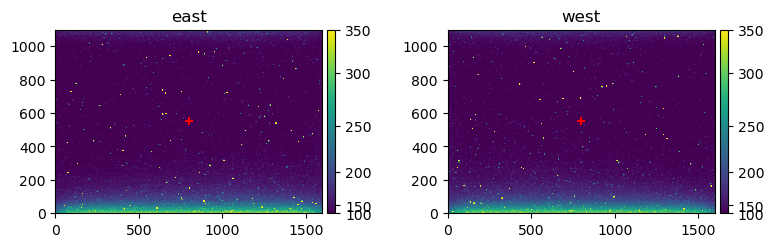

In [22]:
rc = await lvm.skyw.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in filenames]
plot_images(images)


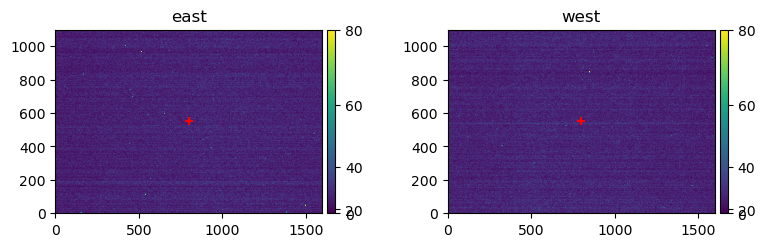

In [6]:
rc = await lvm.skye.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in filenames]
plot_images(images)


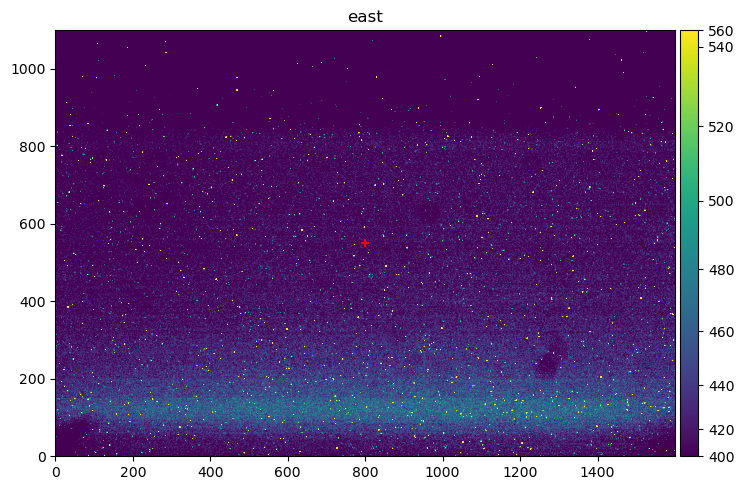

In [11]:
try:
    rc = await lvm.spec.agc.expose( exptime)
    filename = rc.flatten().unpack("*.filename")
    images = [Image.from_file(f) for f in [filename]]
    plot_images(images)

except Exception as ex:
    print(ex)

